In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

100%|██████████| 1.47M/1.47M [00:00<00:00, 36.7MB/s]

Extracting files...
Path to dataset files: C:\Users\sidpk\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [2]:
import pandas as pd

In [5]:
books = pd.read_csv(f"{path}/books.csv")

In [10]:
books.head(2)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(50.58159722222221, 0.5, 'Missing Values')

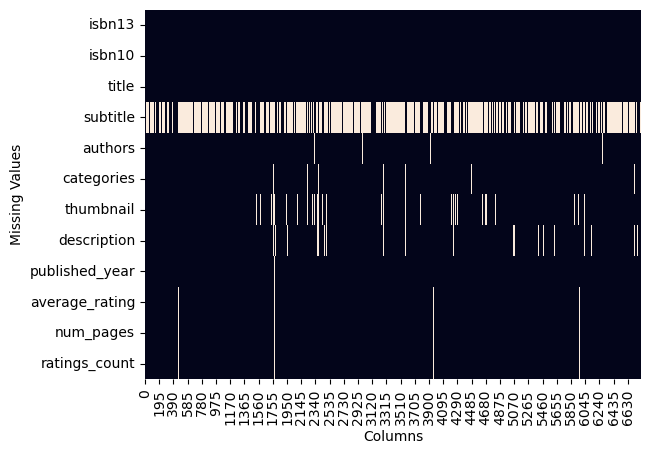

In [12]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)
plt.xlabel("Columns")
plt.ylabel("Missing Values")

In [14]:
import numpy as np
books["missing_description"] = np.where(books["description"].isna(), 1, 0)
books["age_of_book"] = 2025 - books["published_year"]

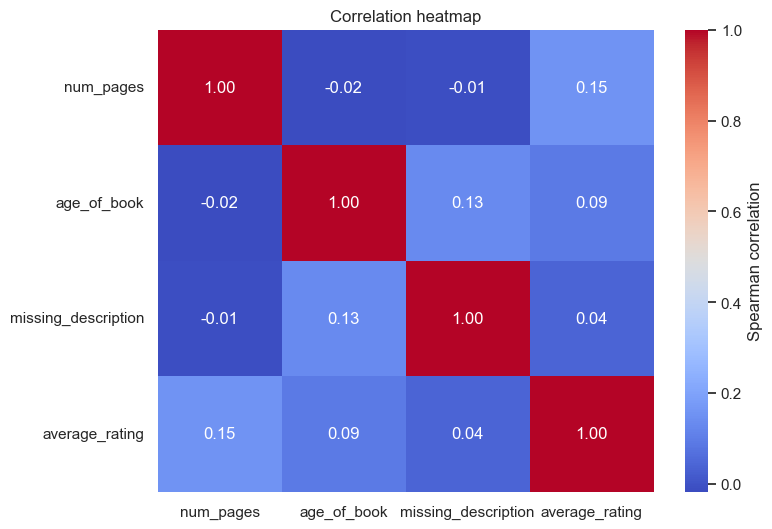

In [ ]:
columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]
correlation_matrix = books[columns_of_interest].corr(method="spearman") #spearman because missing_description is binary

sns.set_theme(style = "white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot = True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

In [16]:
#take-away: missing_description not correlated to num_pages, avg_ratings, or age_of_book

In [ ]:
books[books["description"].isna() |
      books["age_of_book"].isna() |
      books["average_rating"].isna() |
      books["num_pages"].isna()].shape

(303, 14)

In [26]:
books.shape

(6810, 14)

In [27]:
#since missing data is only 303 out of 6810 rows, we can delete it

In [28]:
book_missing = books[~(books["description"].isna()) &
      ~(books["age_of_book"].isna()) &
      ~(books["average_rating"].isna()) &
      ~(books["num_pages"].isna())]
book_missing.shape

(6507, 14)

In [35]:
book_missing["categories"].unique().shape

(532,)

In [36]:
#we have 532 book categories, too many
book_missing["categories"].value_counts().reset_index().sort_values("count", ascending = False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


In [37]:
#distribution of categories is biased towards fiction
book_missing["words_in_description"] = book_missing["description"].str.split().str.len()

C:\Users\sidpk\AppData\Local\Temp\ipykernel_3700\1588901934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing["words_in_description"] = book_missing["description"].str.split().str.len()


In [48]:
book_missing.loc[book_missing["words_in_description"].between(25,34), "description"]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

In [50]:
#if description is less than 25 words, its useless ~based on intuition
book_missing_25_words = book_missing[book_missing["words_in_description"] >= 25]
book_missing_25_words.shape

(5197, 15)

In [54]:
book_missing_25_words["title_and_subtitle"] = np.where(book_missing_25_words["subtitle"].isna(), book_missing_25_words["title"], 
                                                       book_missing_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis = 1))
#combing title and subtitle where subtitle is not empty

C:\Users\sidpk\AppData\Local\Temp\ipykernel_3700\1566792333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["title_and_subtitle"] = np.where(book_missing_25_words["subtitle"].isna(), book_missing_25_words["title"],


In [57]:
book_missing_25_words["tagged_description"] =  book_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis = 1)
book_missing_25_words.head(1)                                                     

C:\Users\sidpk\AppData\Local\Temp\ipykernel_3700\2183966867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["tagged_description"] =  book_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis = 1)


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...


In [63]:
book_missing_25_words.drop(["subtitle","missing_description","age_of_book","words_in_description"], axis = 1).to_csv("books_cleaned.csv", index = False)

In [64]:
#cleaned book data stored in csv